<a href="https://colab.research.google.com/github/A01703130/Evaluacion/blob/main/California.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos librerías requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
     

In [2]:
#Convertir en dataframe
eu= pd.read_csv("California_EUA.csv")
eu
     

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,9.580000e+02,https://www.airbnb.com/rooms/958,2.020000e+13,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,...,4.88,4.98,4.76,City Registration Pending,f,1,1,0,0,2.31
1,5.858000e+03,https://www.airbnb.com/rooms/5858,2.020000e+13,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,...,4.85,4.77,4.68,NaN,f,1,1,0,0,0.66
2,8.142000e+03,https://www.airbnb.com/rooms/8142,2.020000e+13,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,21994,...,4.78,4.67,4.67,NaN,f,13,0,13,0,0.09
3,8.339000e+03,https://www.airbnb.com/rooms/8339,2.020000e+13,06/03/2023,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,24215,...,5.00,4.94,4.75,STR-0000264,f,2,2,0,0,0.17
4,8.739000e+03,https://www.airbnb.com/rooms/8739,2.020000e+13,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,7149,...,4.96,4.93,4.74,STR-0000028,f,2,0,2,0,4.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,8.180000e+17,https://www.airbnb.com/rooms/818195233784141985,2.020000e+13,06/03/2023,city scrape,Powell Place Studio on Nob Hill,Situated in the prestigious Nob Hill section o...,Powell Place is surrounded by everything that ...,https://a0.muscache.com/pictures/miso/Hosting-...,495900269,...,NaN,NaN,NaN,147904,t,5,5,0,0,NaN
6932,8.180000e+17,https://www.airbnb.com/rooms/818231243893035313,2.020000e+13,06/03/2023,city scrape,â€¢ Cozy & Comfortable Castro Artist's Studio â€¢,You'll be in the perfect location to explore a...,"Lively and safe neighborhood, with a local lib...",https://a0.muscache.com/pictures/miso/Hosting-...,499392537,...,5.00,5.00,5.00,2023-001477STR,f,1,1,0,0,1.00
6933,8.180000e+17,https://www.airbnb.com/rooms/818396267693629070,2.020000e+13,06/03/2023,city scrape,Heart of SF ! Close by to Everything,- In-unit washer/dryer<br />-Walk-in Closet <b...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,499294716,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
6934,8.180000e+17,https://www.airbnb.com/rooms/818474518435984613,2.020000e+13,06/03/2023,city scrape,Private room #2 in SF,Enjoy a memorable visit when you stay at our A...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,485596413,...,NaN,NaN,NaN,2022-012562STR,f,3,0,3,0,NaN


# Procesamiento de datos

Justificación: Se determinó que los valores nulos del dataframe se sustituirían por el promedio de los valores de cada columa. Esto solo se realizó en las variables numéricas. Por lo que en las columnas de características los valores nulos se mantienen como Nan.
Se determinó de esta forma debido a que si se ingresa un valor en concreto se modificaría el sentido de los datos o se podrían generar valores extremos.

In [3]:
#Verificamos información del DataFrame
eu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6936 non-null   float64
 1   listing_url                                   6936 non-null   object 
 2   scrape_id                                     6936 non-null   float64
 3   last_scraped                                  6936 non-null   object 
 4   source                                        6936 non-null   object 
 5   name                                          6936 non-null   object 
 6   description                                   6889 non-null   object 
 7   neighborhood_overview                         4850 non-null   object 
 8   picture_url                                   6936 non-null   object 
 9   host_id                                       6936 non-null   i

In [4]:
#Identificar valores nulos por columna
valores_nulos=eu.isnull().sum()
valores_nulos.head(20)

id                          0
listing_url                 0
scrape_id                   0
last_scraped                0
source                      0
name                        0
description                47
neighborhood_overview    2086
picture_url                 0
host_id                     0
host_url                    0
host_name                   0
host_since                  0
host_location            1221
host_about               2252
host_response_time       1019
host_response_rate       1019
host_acceptance_rate      801
host_is_superhost           9
host_thumbnail_url          0
dtype: int64

In [5]:
#Identificar valores nulos por dataframe
valores_nulos=eu.isnull().sum().sum()
valores_nulos

48877

In [6]:
#Reemplazamos valores nulos del dataframe con "mean"
#Realizamos una copia del dataframe
eu2=eu.copy()
eu2=eu2.fillna(round(eu.mean(),1))
eu2

<ipython-input-6-9a9e3db86586>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  eu2=eu2.fillna(round(eu.mean(),1))


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,9.580000e+02,https://www.airbnb.com/rooms/958,2.020000e+13,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,...,4.88,4.98,4.76,City Registration Pending,f,1,1,0,0,2.31
1,5.858000e+03,https://www.airbnb.com/rooms/5858,2.020000e+13,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,...,4.85,4.77,4.68,NaN,f,1,1,0,0,0.66
2,8.142000e+03,https://www.airbnb.com/rooms/8142,2.020000e+13,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,21994,...,4.78,4.67,4.67,NaN,f,13,0,13,0,0.09
3,8.339000e+03,https://www.airbnb.com/rooms/8339,2.020000e+13,06/03/2023,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,24215,...,5.00,4.94,4.75,STR-0000264,f,2,2,0,0,0.17
4,8.739000e+03,https://www.airbnb.com/rooms/8739,2.020000e+13,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,7149,...,4.96,4.93,4.74,STR-0000028,f,2,0,2,0,4.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,8.180000e+17,https://www.airbnb.com/rooms/818195233784141985,2.020000e+13,06/03/2023,city scrape,Powell Place Studio on Nob Hill,Situated in the prestigious Nob Hill section o...,Powell Place is surrounded by everything that ...,https://a0.muscache.com/pictures/miso/Hosting-...,495900269,...,4.90,4.80,4.70,147904,t,5,5,0,0,1.30
6932,8.180000e+17,https://www.airbnb.com/rooms/818231243893035313,2.020000e+13,06/03/2023,city scrape,â€¢ Cozy & Comfortable Castro Artist's Studio â€¢,You'll be in the perfect location to explore a...,"Lively and safe neighborhood, with a local lib...",https://a0.muscache.com/pictures/miso/Hosting-...,499392537,...,5.00,5.00,5.00,2023-001477STR,f,1,1,0,0,1.00
6933,8.180000e+17,https://www.airbnb.com/rooms/818396267693629070,2.020000e+13,06/03/2023,city scrape,Heart of SF ! Close by to Everything,- In-unit washer/dryer<br />-Walk-in Closet <b...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,499294716,...,4.90,4.80,4.70,NaN,f,1,0,1,0,1.30
6934,8.180000e+17,https://www.airbnb.com/rooms/818474518435984613,2.020000e+13,06/03/2023,city scrape,Private room #2 in SF,Enjoy a memorable visit when you stay at our A...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,485596413,...,4.90,4.80,4.70,2022-012562STR,f,3,0,3,0,1.30


In [7]:
#Corroboramos valores nulos del dataframe
valores_nulos=eu2.isnull().sum()
valores_nulos

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 75, dtype: int64

In [8]:
from google.colab import files
valores_nulos.to_csv("nuloscal.csv")

In [9]:
eu2['description'] = eu2['description'].fillna('Sin registro')

In [10]:
eu2['neighborhood_overview'] = eu2['neighborhood_overview'].fillna('Sin registro')

In [11]:
eu2['host_location'] = eu2['host_location'].fillna('Sin registro')

In [12]:
eu2['host_about'] = eu2['host_about'].fillna('Sin registro')

In [13]:
eu2['host_response_time'] = eu2['host_response_time'].fillna('Sin registro')

In [14]:
eu2['host_response_rate'] = eu2['host_response_rate'].fillna('Sin registro')

In [15]:
eu2['host_acceptance_rate'] = eu2['host_acceptance_rate'].fillna(0)

In [16]:
eu2['host_is_superhost'] = eu2['host_is_superhost'].fillna('Sin registro')

In [17]:
eu2['host_neighbourhood'] = eu2['host_neighbourhood'].fillna('Sin registro')

In [18]:
eu2['neighbourhood'] = eu2['neighbourhood'].fillna('Sin registro')

In [19]:
eu2['neighbourhood_group_cleansed'] = eu2['neighbourhood_group_cleansed'].fillna('Sin registro')

In [20]:
eu2['bathrooms'] = eu2['bathrooms'].fillna('--')

In [21]:
eu2['bathrooms_text'] = eu2['bathrooms_text'].fillna('Sin registro')

In [22]:
eu2['calendar_updated'] = eu2['calendar_updated'].fillna('Sin registro')

In [23]:
eu2['first_review'] = eu2['first_review'].fillna('Sin registro')

In [24]:
eu2['last_review'] = eu2['last_review'].fillna('Sin registro')

In [25]:
eu2['license'] = eu2['license'].fillna('Sin registro')

# **Eliminación de Outliers**

Justificación: Se definió utilizar el método de desviación estándar para la eliminación de los outliers en el dataframe. Esto es con la finalidad de que se determinara que los valores más allá de la desviación estándar se eliminaran. Esto lo decidí ya que las desviaciones de las variables en su mayoría no son muy significativas

<Figure size 1500x800 with 0 Axes>

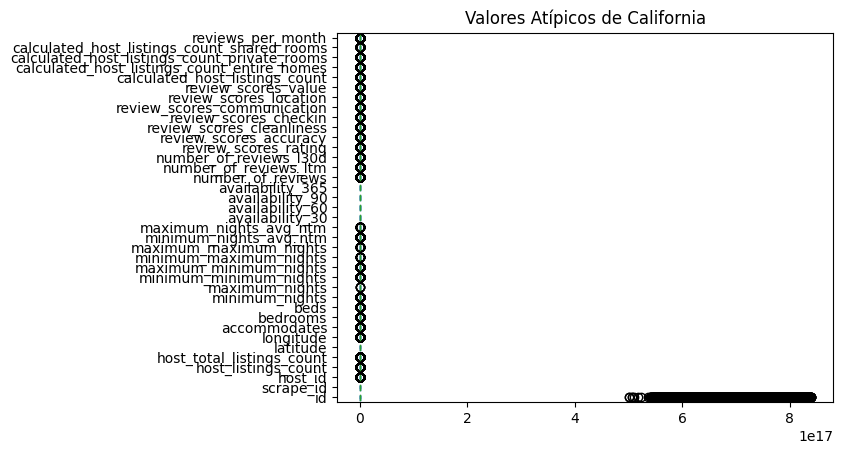

In [26]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
eu2.plot(kind='box', vert=False)
plt.title("Valores Atípicos de California")
plt.show() #dibujamos el diagrama

In [27]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=eu2
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

<ipython-input-27-ed6113925230>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3*y.std()
<ipython-input-27-ed6113925230>:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3*y.std()


Limite superior permitido id                                              1.054631e+18
scrape_id                                       2.020000e+13
host_id                                         5.371002e+08
host_listings_count                             2.300397e+03
host_total_listings_count                       2.842239e+03
latitude                                        3.783716e+01
longitude                                      -1.223476e+02
accommodates                                    9.034994e+00
bedrooms                                        4.070980e+00
beds                                            5.370675e+00
minimum_nights                                  1.755102e+02
maximum_nights                                  3.662171e+04
minimum_minimum_nights                          1.955348e+02
maximum_minimum_nights                          2.404551e+02
minimum_maximum_nights                          3.039438e+08
maximum_maximum_nights                          4.321034e+0

<ipython-input-27-ed6113925230>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Inferior= y.mean() - 3*y.std()
<ipython-input-27-ed6113925230>:4: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Inferior= y.mean() - 3*y.std()


In [28]:
#Encontramos Ouliers del Dataframe
outliers= eu2[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

<ipython-input-28-48ea00640ffc>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers= eu2[(y>Limite_Superior)|(y<Limite_Inferior)]


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#Eliminamos columnas innecesarias
eu3= eu2.drop(['id'], axis=1)
eu3

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/958,2.020000e+13,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,...,4.88,4.98,4.76,City Registration Pending,f,1,1,0,0,2.31
1,https://www.airbnb.com/rooms/5858,2.020000e+13,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,https://www.airbnb.com/users/show/8904,...,4.85,4.77,4.68,Sin registro,f,1,1,0,0,0.66
2,https://www.airbnb.com/rooms/8142,2.020000e+13,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,21994,https://www.airbnb.com/users/show/21994,...,4.78,4.67,4.67,Sin registro,f,13,0,13,0,0.09
3,https://www.airbnb.com/rooms/8339,2.020000e+13,06/03/2023,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,24215,https://www.airbnb.com/users/show/24215,...,5.00,4.94,4.75,STR-0000264,f,2,2,0,0,0.17
4,https://www.airbnb.com/rooms/8739,2.020000e+13,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,7149,https://www.airbnb.com/users/show/7149,...,4.96,4.93,4.74,STR-0000028,f,2,0,2,0,4.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,https://www.airbnb.com/rooms/818195233784141985,2.020000e+13,06/03/2023,city scrape,Powell Place Studio on Nob Hill,Situated in the prestigious Nob Hill section o...,Powell Place is surrounded by everything that ...,https://a0.muscache.com/pictures/miso/Hosting-...,495900269,https://www.airbnb.com/users/show/495900269,...,4.90,4.80,4.70,147904,t,5,5,0,0,1.30
6932,https://www.airbnb.com/rooms/818231243893035313,2.020000e+13,06/03/2023,city scrape,â€¢ Cozy & Comfortable Castro Artist's Studio â€¢,You'll be in the perfect location to explore a...,"Lively and safe neighborhood, with a local lib...",https://a0.muscache.com/pictures/miso/Hosting-...,499392537,https://www.airbnb.com/users/show/499392537,...,5.00,5.00,5.00,2023-001477STR,f,1,1,0,0,1.00
6933,https://www.airbnb.com/rooms/818396267693629070,2.020000e+13,06/03/2023,city scrape,Heart of SF ! Close by to Everything,- In-unit washer/dryer<br />-Walk-in Closet <b...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,499294716,https://www.airbnb.com/users/show/499294716,...,4.90,4.80,4.70,Sin registro,f,1,0,1,0,1.30
6934,https://www.airbnb.com/rooms/818474518435984613,2.020000e+13,06/03/2023,city scrape,Private room #2 in SF,Enjoy a memorable visit when you stay at our A...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,485596413,https://www.airbnb.com/users/show/485596413,...,4.90,4.80,4.70,2022-012562STR,f,3,0,3,0,1.30


In [30]:
#Corroboramos valores nulos del dataframe4
valores_nulos=eu3.isnull().sum()
valores_nulos

listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
name                                            0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 74, dtype: int64

In [31]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=eu3.copy()
data_clean=data_clean.fillna(round(eu3.mean(),1))
data_clean

<ipython-input-31-6426a03de2a5>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_clean=data_clean.fillna(round(eu3.mean(),1))


,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/958,2.020000e+13,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,...,4.88,4.98,4.76,City Registration Pending,f,1,1,0,0,2.31
1,https://www.airbnb.com/rooms/5858,2.020000e+13,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,https://www.airbnb.com/users/show/8904,...,4.85,4.77,4.68,Sin registro,f,1,1,0,0,0.66
2,https://www.airbnb.com/rooms/8142,2.020000e+13,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,21994,https://www.airbnb.com/users/show/21994,...,4.78,4.67,4.67,Sin registro,f,13,0,13,0,0.09
3,https://www.airbnb.com/rooms/8339,2.020000e+13,06/03/2023,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,24215,https://www.airbnb.com/users/show/24215,...,5.00,4.94,4.75,STR-0000264,f,2,2,0,0,0.17
4,https://www.airbnb.com/rooms/8739,2.020000e+13,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,7149,https://www.airbnb.com/users/show/7149,...,4.96,4.93,4.74,STR-0000028,f,2,0,2,0,4.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,https://www.airbnb.com/rooms/818195233784141985,2.020000e+13,06/03/2023,city scrape,Powell Place Studio on Nob Hill,Situated in the prestigious Nob Hill section o...,Powell Place is surrounded by everything that ...,https://a0.muscache.com/pictures/miso/Hosting-...,495900269,https://www.airbnb.com/users/show/495900269,...,4.90,4.80,4.70,147904,t,5,5,0,0,1.30
6932,https://www.airbnb.com/rooms/818231243893035313,2.020000e+13,06/03/2023,city scrape,â€¢ Cozy & Comfortable Castro Artist's Studio â€¢,You'll be in the perfect location to explore a...,"Lively and safe neighborhood, with a local lib...",https://a0.muscache.com/pictures/miso/Hosting-...,499392537,https://www.airbnb.com/users/show/499392537,...,5.00,5.00,5.00,2023-001477STR,f,1,1,0,0,1.00
6933,https://www.airbnb.com/rooms/818396267693629070,2.020000e+13,06/03/2023,city scrape,Heart of SF ! Close by to Everything,- In-unit washer/dryer<br />-Walk-in Closet <b...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,499294716,https://www.airbnb.com/users/show/499294716,...,4.90,4.80,4.70,Sin registro,f,1,0,1,0,1.30
6934,https://www.airbnb.com/rooms/818474518435984613,2.020000e+13,06/03/2023,city scrape,Private room #2 in SF,Enjoy a memorable visit when you stay at our A...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,485596413,https://www.airbnb.com/users/show/485596413,...,4.90,4.80,4.70,2022-012562STR,f,3,0,3,0,1.30


In [32]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
name                                            0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 74, dtype: int64

In [33]:
from google.colab import files
data_clean.to_csv("California-limpio.csv")

ETAPA 2: Extracción  de DATOS

In [79]:
data_clean["host_acceptance_rate"]=data_clean["host_acceptance_rate"].replace({"%":" "},regex=False)

In [81]:
data_clean.host_acceptance_rate=data_clean.host_acceptance_rate.astype(str)

In [83]:
#a) host_acceptance_rate> 50%
filtro1=data_clean[data_clean["host_acceptance_rate"] > "50"]
filtro1

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
1,https://www.airbnb.com/rooms/5858,2.020000e+13,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,https://www.airbnb.com/users/show/8904,...,4.85,4.77,4.68,Sin registro,f,1,1,0,0,0.66
2,https://www.airbnb.com/rooms/8142,2.020000e+13,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,21994,https://www.airbnb.com/users/show/21994,...,4.78,4.67,4.67,Sin registro,f,13,0,13,0,0.09
4,https://www.airbnb.com/rooms/8739,2.020000e+13,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,7149,https://www.airbnb.com/users/show/7149,...,4.96,4.93,4.74,STR-0000028,f,2,0,2,0,4.65
5,https://www.airbnb.com/rooms/142177,2.020000e+13,06/03/2023,city scrape,"Stylish, Spacious and Quiet Flat!",***Will consider small pets. One pet per stay...,Experience the real San Francisco and stay whe...,https://a0.muscache.com/pictures/miso/Hosting-...,656263,https://www.airbnb.com/users/show/656263,...,4.97,4.78,4.80,STR-0002192,f,1,1,0,0,1.69
6,https://www.airbnb.com/rooms/490931,2.020000e+13,06/03/2023,city scrape,"Mission's ""La Lengua""",Sunny apt in a great corner of the Mission. Y...,"great food, bars, and walk to everything, incl...",https://a0.muscache.com/pictures/5841012/ee765...,1269188,https://www.airbnb.com/users/show/1269188,...,4.78,4.77,4.66,Sin registro,f,1,0,1,0,0.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6925,https://www.airbnb.com/rooms/817053637695588890,2.020000e+13,06/03/2023,city scrape,Modern Room in San Francisco - 7,Beautiful comfortable room in a quiet neighbor...,Home is located in the Bayview area overlookin...,https://a0.muscache.com/pictures/miso/Hosting-...,222540569,https://www.airbnb.com/users/show/222540569,...,5.00,5.00,5.00,2022-012006STR,f,7,0,7,0,2.00
6926,https://www.airbnb.com/rooms/817067809700979706,2.020000e+13,06/03/2023,city scrape,Modern Room in San Francisco - 8,Beautiful comfortable room in a quiet neighbor...,Home is located in the Bayview area overlookin...,https://a0.muscache.com/pictures/miso/Hosting-...,222540569,https://www.airbnb.com/users/show/222540569,...,5.00,4.56,4.89,2022-012006STR,f,7,0,7,0,8.44
6927,https://www.airbnb.com/rooms/817390268252267687,2.020000e+13,06/03/2023,city scrape,Charming hotel room in downtown,Enjoy easy access to popular shops and restaur...,Russian Hill is directly to the north (and sli...,https://a0.muscache.com/pictures/miso/Hosting-...,486687635,https://www.airbnb.com/users/show/486687635,...,5.00,5.00,5.00,Exempt,f,26,0,26,0,1.00
6929,https://www.airbnb.com/rooms/817686120681200035,2.020000e+13,06/03/2023,city scrape,SF Spacious Room w/Kitchen/Patio/ComfyBed/Laundry,Our home is carefully designed for long-term s...,This residential neighborhood is quiet with fa...,https://a0.muscache.com/pictures/miso/Hosting-...,226555948,https://www.airbnb.com/users/show/226555948,...,4.90,4.80,4.70,Sin registro,f,14,3,11,0,1.30


In [84]:
from google.colab import files
filtro1.to_csv("filtro1Cal.csv")

In [45]:
#Sólo los registros con categoría “superhost”
filtro2=data_clean[data_clean["host_is_superhost"] == "t"]
filtro2
     

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/958,2.020000e+13,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,...,4.88,4.98,4.76,City Registration Pending,f,1,1,0,0,2.31
4,https://www.airbnb.com/rooms/8739,2.020000e+13,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,7149,https://www.airbnb.com/users/show/7149,...,4.96,4.93,4.74,STR-0000028,f,2,0,2,0,4.65
7,https://www.airbnb.com/rooms/10537,2.020000e+13,06/03/2023,city scrape,Elegant & Cozy w/City views. Private room: Purple,Casa de Paz (House of Peace) is like staying w...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,36752,https://www.airbnb.com/users/show/36752,...,5.00,4.14,4.46,2022-011003STR,f,2,0,2,0,0.12
8,https://www.airbnb.com/rooms/491867,2.020000e+13,06/03/2023,city scrape,Central San Francisco Urban Dream,3 BR/2 BA Victorian flat beautifully restored ...,"Nearby market: Right out the front door, righ...",https://a0.muscache.com/pictures/miso/Hosting-...,969518,https://www.airbnb.com/users/show/969518,...,4.91,4.91,4.75,STR-0000192,f,1,1,0,0,0.44
9,https://www.airbnb.com/rooms/144242,2.020000e+13,06/03/2023,city scrape,Lake Street Single Family Home,Our full-time home (available when we are away...,Sin registro,https://a0.muscache.com/pictures/c175c400-edad...,699215,https://www.airbnb.com/users/show/699215,...,5.00,4.89,4.95,2022-011317STR,f,1,1,0,0,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913,https://www.airbnb.com/rooms/815561340398335999,2.020000e+13,06/03/2023,city scrape,"Spacious Studio w/ Kitchenette, Private Bath &...",Enjoy our spacious studio with modern amenitie...,Our house is conveniently located near Freeway...,https://a0.muscache.com/pictures/96bb96cd-6626...,36046172,https://www.airbnb.com/users/show/36046172,...,5.00,5.00,5.00,1133735,f,2,0,2,0,4.00
6918,https://www.airbnb.com/rooms/816211107298614925,2.020000e+13,06/03/2023,previous scrape,Cozy room in the heart of SF,Enjoy everything SF has to offer in this cozy ...,The house is in Mission Dolores which is centr...,https://a0.muscache.com/pictures/miso/Hosting-...,375566645,https://www.airbnb.com/users/show/375566645,...,4.90,4.80,4.70,Sin registro,f,14,0,14,0,1.30
6919,https://www.airbnb.com/rooms/816849292948023117,2.020000e+13,06/03/2023,city scrape,Elegant and Spacious 2bdrm 2bth,Great location:<br />â€¢ Steps away from prime...,Great location:<br />â€¢ Steps away from prime...,https://a0.muscache.com/pictures/miso/Hosting-...,330231,https://www.airbnb.com/users/show/330231,...,4.90,4.80,4.70,Sin registro,t,10,10,0,0,1.30
6923,https://www.airbnb.com/rooms/816998498709351546,2.020000e+13,06/03/2023,previous scrape,Live-Work Downtown San Francisco Loft,Furnished Live-Work NY-style loft with exposed...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,4452428,https://www.airbnb.com/users/show/4452428,...,4.90,4.80,4.70,Sin registro,f,1,1,0,0,1.30


In [46]:
from google.colab import files
filtro2.to_csv("filtro2Cal.csv")

In [47]:
#Los registros que no hallan verificado identidad “ not identity_verified”
filtro3=data_clean[data_clean["host_identity_verified"] == "f"]
filtro3
     

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
6,https://www.airbnb.com/rooms/490931,2.020000e+13,06/03/2023,city scrape,"Mission's ""La Lengua""",Sunny apt in a great corner of the Mission. Y...,"great food, bars, and walk to everything, incl...",https://a0.muscache.com/pictures/5841012/ee765...,1269188,https://www.airbnb.com/users/show/1269188,...,4.78,4.77,4.66,Sin registro,f,1,0,1,0,0.74
28,https://www.airbnb.com/rooms/18231,2.020000e+13,06/03/2023,city scrape,Loft-like Apt./Garden,"Located on 26th St. in wonderful Noe Valley, t...",We love Noe Valley. It is a wonderful friendly...,https://a0.muscache.com/pictures/145020/505b89...,70224,https://www.airbnb.com/users/show/70224,...,4.90,4.89,4.75,Sin registro,f,1,1,0,0,0.44
38,https://www.airbnb.com/rooms/193292,2.020000e+13,06/03/2023,city scrape,Nice Rooms With Private 1/2 Bath,<b>The space</b><br />Please come and enjoy ou...,Sin registro,https://a0.muscache.com/pictures/1783939/e4fa3...,937281,https://www.airbnb.com/users/show/937281,...,5.00,4.95,4.90,Sin registro,f,1,0,1,0,0.46
39,https://www.airbnb.com/rooms/201313,2.020000e+13,06/03/2023,city scrape,Fully Furnished 1 bedroom apartment,"Tastefully decorated modern one bedroom, one b...",Location is prime! You are located within a sh...,https://a0.muscache.com/pictures/c96832f5-2ece...,984585,https://www.airbnb.com/users/show/984585,...,5.00,5.00,4.00,Sin registro,f,1,1,0,0,0.05
71,https://www.airbnb.com/rooms/231129,2.020000e+13,06/03/2023,city scrape,Nob Hill Mini Mansion,The Dollhouse offers the opportunity to experi...,Sin registro,https://a0.muscache.com/pictures/2123962/10ffd...,1208533,https://www.airbnb.com/users/show/1208533,...,4.38,4.84,4.28,City Registration Pending,f,5,1,4,0,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6885,https://www.airbnb.com/rooms/808995594566778409,2.020000e+13,06/03/2023,city scrape,8A-Private Room (share bath) at Marina/Cow Hollow,Our quiet private room is located at the inter...,Our room offers access to both the Marina and ...,https://a0.muscache.com/pictures/miso/Hosting-...,157999191,https://www.airbnb.com/users/show/157999191,...,4.90,4.80,4.70,Sin registro,f,24,1,23,0,1.30
6905,https://www.airbnb.com/rooms/813099498776240866,2.020000e+13,06/03/2023,city scrape,Spacious Suite with Private Bath,Spacious and charming bedroom with work desk a...,Property is located in the quaint Lakeshore ne...,https://a0.muscache.com/pictures/miso/Hosting-...,240202942,https://www.airbnb.com/users/show/240202942,...,5.00,4.50,5.00,2022-013018STR,t,2,2,0,0,2.00
6931,https://www.airbnb.com/rooms/818195233784141985,2.020000e+13,06/03/2023,city scrape,Powell Place Studio on Nob Hill,Situated in the prestigious Nob Hill section o...,Powell Place is surrounded by everything that ...,https://a0.muscache.com/pictures/miso/Hosting-...,495900269,https://www.airbnb.com/users/show/495900269,...,4.90,4.80,4.70,147904,t,5,5,0,0,1.30
6932,https://www.airbnb.com/rooms/818231243893035313,2.020000e+13,06/03/2023,city scrape,â€¢ Cozy & Comfortable Castro Artist's Studio â€¢,You'll be in the perfect location to explore a...,"Lively and safe neighborhood, with a local lib...",https://a0.muscache.com/pictures/miso/Hosting-...,499392537,https://www.airbnb.com/users/show/499392537,...,5.00,5.00,5.00,2023-001477STR,f,1,1,0,0,1.00


In [48]:
from google.colab import files
filtro3.to_csv("filtro3Cal.csv")

In [49]:
 #Los registro cuyo property_type = “Private room” y “Hotel room”
filtro4=data_clean[(data_clean["property_type"] == "Private room") | (data_clean["property_type"] == "Hotel room")]
filtro4.head(6)

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
7,https://www.airbnb.com/rooms/10537,2.020000e+13,06/03/2023,city scrape,Elegant & Cozy w/City views. Private room: Purple,Casa de Paz (House of Peace) is like staying w...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,36752,https://www.airbnb.com/users/show/36752,...,5.00,4.14,4.46,2022-011003STR,f,2,0,2,0,0.12
1575,https://www.airbnb.com/rooms/14305759,2.020000e+13,06/03/2023,city scrape,Mission District Private Yoga Room for two,Take a moment for mindfulness. Give yourself t...,Great Neighborhood with many Restaurants nearby.,https://a0.muscache.com/pictures/75847296-c23b...,29483318,https://www.airbnb.com/users/show/29483318,...,4.81,4.67,4.34,City registration pending,t,3,0,3,0,1.45
2049,https://www.airbnb.com/rooms/20957462,2.020000e+13,06/03/2023,city scrape,Sunny Studio with Golden Gate Bridge View,Bright and quiet studio in vibrant Russian Hil...,Sin registro,https://a0.muscache.com/pictures/d998ca8d-f6fa...,150732464,https://www.airbnb.com/users/show/150732464,...,4.94,4.72,4.44,Sin registro,t,7,5,2,0,0.30
4014,https://www.airbnb.com/rooms/43477461,2.020000e+13,06/03/2023,city scrape,Bright Nice Studio,Sin registro,Sin registro,https://a0.muscache.com/pictures/e45d07d1-947e...,150732464,https://www.airbnb.com/users/show/150732464,...,5.00,5.00,3.50,Sin registro,f,7,5,2,0,0.16


In [50]:
from google.colab import files
filtro4.to_csv("filtro4Cal.csv")

In [51]:
#Los registros que cuenten con bathroom > 1
filtro5=data_clean[data_clean["bathrooms_text"] > "1"]
filtro5

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/958,2.020000e+13,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,...,4.88,4.98,4.76,City Registration Pending,f,1,1,0,0,2.31
1,https://www.airbnb.com/rooms/5858,2.020000e+13,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,https://www.airbnb.com/users/show/8904,...,4.85,4.77,4.68,Sin registro,f,1,1,0,0,0.66
2,https://www.airbnb.com/rooms/8142,2.020000e+13,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,21994,https://www.airbnb.com/users/show/21994,...,4.78,4.67,4.67,Sin registro,f,13,0,13,0,0.09
3,https://www.airbnb.com/rooms/8339,2.020000e+13,06/03/2023,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,24215,https://www.airbnb.com/users/show/24215,...,5.00,4.94,4.75,STR-0000264,f,2,2,0,0,0.17
4,https://www.airbnb.com/rooms/8739,2.020000e+13,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,7149,https://www.airbnb.com/users/show/7149,...,4.96,4.93,4.74,STR-0000028,f,2,0,2,0,4.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,https://www.airbnb.com/rooms/818195233784141985,2.020000e+13,06/03/2023,city scrape,Powell Place Studio on Nob Hill,Situated in the prestigious Nob Hill section o...,Powell Place is surrounded by everything that ...,https://a0.muscache.com/pictures/miso/Hosting-...,495900269,https://www.airbnb.com/users/show/495900269,...,4.90,4.80,4.70,147904,t,5,5,0,0,1.30
6932,https://www.airbnb.com/rooms/818231243893035313,2.020000e+13,06/03/2023,city scrape,â€¢ Cozy & Comfortable Castro Artist's Studio â€¢,You'll be in the perfect location to explore a...,"Lively and safe neighborhood, with a local lib...",https://a0.muscache.com/pictures/miso/Hosting-...,499392537,https://www.airbnb.com/users/show/499392537,...,5.00,5.00,5.00,2023-001477STR,f,1,1,0,0,1.00
6933,https://www.airbnb.com/rooms/818396267693629070,2.020000e+13,06/03/2023,city scrape,Heart of SF ! Close by to Everything,- In-unit washer/dryer<br />-Walk-in Closet <b...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,499294716,https://www.airbnb.com/users/show/499294716,...,4.90,4.80,4.70,Sin registro,f,1,0,1,0,1.30
6934,https://www.airbnb.com/rooms/818474518435984613,2.020000e+13,06/03/2023,city scrape,Private room #2 in SF,Enjoy a memorable visit when you stay at our A...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,485596413,https://www.airbnb.com/users/show/485596413,...,4.90,4.80,4.70,2022-012562STR,f,3,0,3,0,1.30


In [52]:
#from google.colab import files
filtro5.to_csv("filtro5Cal.csv")

In [53]:
#Los registros cuyo precio sea mayor de $10,000 y que sean de tipo “Entire home”
filtro6=data_clean[(data_clean["price"] > "10000") & (data_clean["room_type"] == "Entire home")]
filtro6

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


In [54]:
#from google.colab import files
filtro6.to_csv("filtro6Cal.csv")

In [55]:
#Los registros cuyo review_scores_cleanliness > 4.5
filtro7=data_clean[data_clean["review_scores_cleanliness"] > 4.5]
filtro7

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/958,2.020000e+13,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,...,4.88,4.98,4.76,City Registration Pending,f,1,1,0,0,2.31
1,https://www.airbnb.com/rooms/5858,2.020000e+13,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,https://www.airbnb.com/users/show/8904,...,4.85,4.77,4.68,Sin registro,f,1,1,0,0,0.66
3,https://www.airbnb.com/rooms/8339,2.020000e+13,06/03/2023,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,24215,https://www.airbnb.com/users/show/24215,...,5.00,4.94,4.75,STR-0000264,f,2,2,0,0,0.17
4,https://www.airbnb.com/rooms/8739,2.020000e+13,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,7149,https://www.airbnb.com/users/show/7149,...,4.96,4.93,4.74,STR-0000028,f,2,0,2,0,4.65
5,https://www.airbnb.com/rooms/142177,2.020000e+13,06/03/2023,city scrape,"Stylish, Spacious and Quiet Flat!",***Will consider small pets. One pet per stay...,Experience the real San Francisco and stay whe...,https://a0.muscache.com/pictures/miso/Hosting-...,656263,https://www.airbnb.com/users/show/656263,...,4.97,4.78,4.80,STR-0002192,f,1,1,0,0,1.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,https://www.airbnb.com/rooms/818195233784141985,2.020000e+13,06/03/2023,city scrape,Powell Place Studio on Nob Hill,Situated in the prestigious Nob Hill section o...,Powell Place is surrounded by everything that ...,https://a0.muscache.com/pictures/miso/Hosting-...,495900269,https://www.airbnb.com/users/show/495900269,...,4.90,4.80,4.70,147904,t,5,5,0,0,1.30
6932,https://www.airbnb.com/rooms/818231243893035313,2.020000e+13,06/03/2023,city scrape,â€¢ Cozy & Comfortable Castro Artist's Studio â€¢,You'll be in the perfect location to explore a...,"Lively and safe neighborhood, with a local lib...",https://a0.muscache.com/pictures/miso/Hosting-...,499392537,https://www.airbnb.com/users/show/499392537,...,5.00,5.00,5.00,2023-001477STR,f,1,1,0,0,1.00
6933,https://www.airbnb.com/rooms/818396267693629070,2.020000e+13,06/03/2023,city scrape,Heart of SF ! Close by to Everything,- In-unit washer/dryer<br />-Walk-in Closet <b...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,499294716,https://www.airbnb.com/users/show/499294716,...,4.90,4.80,4.70,Sin registro,f,1,0,1,0,1.30
6934,https://www.airbnb.com/rooms/818474518435984613,2.020000e+13,06/03/2023,city scrape,Private room #2 in SF,Enjoy a memorable visit when you stay at our A...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,485596413,https://www.airbnb.com/users/show/485596413,...,4.90,4.80,4.70,2022-012562STR,f,3,0,3,0,1.30


In [56]:
#from google.colab import files
filtro7.to_csv("filtro7Cal.csv")

In [57]:
#Los registros cuyo review_scores_value > 4.9
filtro8=data_clean[data_clean["review_scores_value"] > 4.9]
filtro8

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
9,https://www.airbnb.com/rooms/144242,2.020000e+13,06/03/2023,city scrape,Lake Street Single Family Home,Our full-time home (available when we are away...,Sin registro,https://a0.muscache.com/pictures/c175c400-edad...,699215,https://www.airbnb.com/users/show/699215,...,5.00,4.89,4.95,2022-011317STR,f,1,1,0,0,0.15
24,https://www.airbnb.com/rooms/149108,2.020000e+13,06/03/2023,city scrape,Luxury UCSF Cole Valley Condo w/Tesla Charger,Our home is an absolute jewel box. It is secur...,"Cole Valley is a small, family-friendly commun...",https://a0.muscache.com/pictures/25525215/7e4b...,719538,https://www.airbnb.com/users/show/719538,...,5.00,5.00,5.00,Sin registro,f,1,1,0,0,0.03
26,https://www.airbnb.com/rooms/12522,2.020000e+13,06/03/2023,previous scrape,Perfectly located Castro,1895 Victorian flat w/ 12 ft ceilings. (No Lon...,Sin registro,https://a0.muscache.com/pictures/9158991/d0fa6...,18431,https://www.airbnb.com/users/show/18431,...,4.96,4.94,4.93,STR-0000057,f,1,0,1,0,2.79
46,https://www.airbnb.com/rooms/530857,2.020000e+13,06/03/2023,city scrape,"Sunny, quiet private room with parking",1920's three bedroom house with a formal dinin...,2 blocks away is Broken Record. It's a whiskey...,https://a0.muscache.com/pictures/713aa5ff-4026...,2607120,https://www.airbnb.com/users/show/2607120,...,4.97,4.87,4.95,STR-0003035,t,2,0,2,0,0.65
53,https://www.airbnb.com/rooms/561602,2.020000e+13,06/03/2023,city scrape,"Great view in the Mission, 15 mins by bus down...",Stunning view of SFâ€™s highest hill from your...,My house on a quiet brick cul-de-sac in Bernal...,https://a0.muscache.com/pictures/0dc1946f-936c...,2760904,https://www.airbnb.com/users/show/2760904,...,4.98,4.88,4.91,STR-0001006,f,1,0,1,0,1.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6920,https://www.airbnb.com/rooms/816871631018815995,2.020000e+13,06/03/2023,city scrape,Queen Private - ADA,"A short walk from Fishermanâ€™s Wharf, home to...",Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,407298390,https://www.airbnb.com/users/show/407298390,...,5.00,5.00,5.00,Exempt,t,9,0,5,4,1.00
6924,https://www.airbnb.com/rooms/817017027613797792,2.020000e+13,06/03/2023,city scrape,Modern Room in San Francisco - 6,Enjoy beautiful serene views of the San Franci...,Home is located in the Bayview area overlookin...,https://a0.muscache.com/pictures/miso/Hosting-...,222540569,https://www.airbnb.com/users/show/222540569,...,5.00,5.00,5.00,2022-012006STR,f,7,0,7,0,1.00
6925,https://www.airbnb.com/rooms/817053637695588890,2.020000e+13,06/03/2023,city scrape,Modern Room in San Francisco - 7,Beautiful comfortable room in a quiet neighbor...,Home is located in the Bayview area overlookin...,https://a0.muscache.com/pictures/miso/Hosting-...,222540569,https://www.airbnb.com/users/show/222540569,...,5.00,5.00,5.00,2022-012006STR,f,7,0,7,0,2.00
6927,https://www.airbnb.com/rooms/817390268252267687,2.020000e+13,06/03/2023,city scrape,Charming hotel room in downtown,Enjoy easy access to popular shops and restaur...,Russian Hill is directly to the north (and sli...,https://a0.muscache.com/pictures/miso/Hosting-...,486687635,https://www.airbnb.com/users/show/486687635,...,5.00,5.00,5.00,Exempt,f,26,0,26,0,1.00


In [58]:
#from google.colab import files
filtro8.to_csv("filtro8Cal.csv")

In [59]:
#Los registros cuya availability_365< 100
filtro9=data_clean[data_clean["availability_365"] < 100]
filtro9

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
5,https://www.airbnb.com/rooms/142177,2.020000e+13,06/03/2023,city scrape,"Stylish, Spacious and Quiet Flat!",***Will consider small pets. One pet per stay...,Experience the real San Francisco and stay whe...,https://a0.muscache.com/pictures/miso/Hosting-...,656263,https://www.airbnb.com/users/show/656263,...,4.97,4.78,4.80,STR-0002192,f,1,1,0,0,1.69
8,https://www.airbnb.com/rooms/491867,2.020000e+13,06/03/2023,city scrape,Central San Francisco Urban Dream,3 BR/2 BA Victorian flat beautifully restored ...,"Nearby market: Right out the front door, righ...",https://a0.muscache.com/pictures/miso/Hosting-...,969518,https://www.airbnb.com/users/show/969518,...,4.91,4.91,4.75,STR-0000192,f,1,1,0,0,0.44
9,https://www.airbnb.com/rooms/144242,2.020000e+13,06/03/2023,city scrape,Lake Street Single Family Home,Our full-time home (available when we are away...,Sin registro,https://a0.muscache.com/pictures/c175c400-edad...,699215,https://www.airbnb.com/users/show/699215,...,5.00,4.89,4.95,2022-011317STR,f,1,1,0,0,0.15
11,https://www.airbnb.com/rooms/144978,2.020000e+13,06/03/2023,city scrape,Prime Location - Small Basic Room,<b>The space</b><br />This is a small room in ...,Sin registro,https://a0.muscache.com/pictures/915742/ada9fb...,216682,https://www.airbnb.com/users/show/216682,...,4.81,4.82,4.67,Sin registro,f,9,4,5,0,0.85
15,https://www.airbnb.com/rooms/501770,2.020000e+13,06/03/2023,city scrape,Contemporary Home with Mid-Century Modern Design,The perfect San Francisco getaway retreat is w...,The apartment is centrally located in the Haig...,https://a0.muscache.com/pictures/58e2b55d-10e7...,2475480,https://www.airbnb.com/users/show/2475480,...,4.87,4.74,4.59,Sin registro,f,5,5,0,0,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913,https://www.airbnb.com/rooms/815561340398335999,2.020000e+13,06/03/2023,city scrape,"Spacious Studio w/ Kitchenette, Private Bath &...",Enjoy our spacious studio with modern amenitie...,Our house is conveniently located near Freeway...,https://a0.muscache.com/pictures/96bb96cd-6626...,36046172,https://www.airbnb.com/users/show/36046172,...,5.00,5.00,5.00,1133735,f,2,0,2,0,4.00
6917,https://www.airbnb.com/rooms/816028610191508453,2.020000e+13,06/03/2023,city scrape,Hillside Gem in Noe Valley,Our stylish and modern junior 1-bedroom flat i...,Noe Valley in San Francisco is a family-friend...,https://a0.muscache.com/pictures/miso/Hosting-...,45555637,https://www.airbnb.com/users/show/45555637,...,4.90,4.80,4.70,2023-001339STR,f,1,1,0,0,1.30
6918,https://www.airbnb.com/rooms/816211107298614925,2.020000e+13,06/03/2023,previous scrape,Cozy room in the heart of SF,Enjoy everything SF has to offer in this cozy ...,The house is in Mission Dolores which is centr...,https://a0.muscache.com/pictures/miso/Hosting-...,375566645,https://www.airbnb.com/users/show/375566645,...,4.90,4.80,4.70,Sin registro,f,14,0,14,0,1.30
6923,https://www.airbnb.com/rooms/816998498709351546,2.020000e+13,06/03/2023,previous scrape,Live-Work Downtown San Francisco Loft,Furnished Live-Work NY-style loft with exposed...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,4452428,https://www.airbnb.com/users/show/4452428,...,4.90,4.80,4.70,Sin registro,f,1,1,0,0,1.30


In [60]:
#from google.colab import files
filtro9.to_csv("filtro9Cal.csv")

In [61]:
#Los registros cuya host_response_time sea “within an hour”
filtro10=data_clean[data_clean["host_response_time"] == "within an hour"]
filtro10

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/958,2.020000e+13,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,...,4.88,4.98,4.76,City Registration Pending,f,1,1,0,0,2.31
2,https://www.airbnb.com/rooms/8142,2.020000e+13,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,21994,https://www.airbnb.com/users/show/21994,...,4.78,4.67,4.67,Sin registro,f,13,0,13,0,0.09
4,https://www.airbnb.com/rooms/8739,2.020000e+13,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,7149,https://www.airbnb.com/users/show/7149,...,4.96,4.93,4.74,STR-0000028,f,2,0,2,0,4.65
5,https://www.airbnb.com/rooms/142177,2.020000e+13,06/03/2023,city scrape,"Stylish, Spacious and Quiet Flat!",***Will consider small pets. One pet per stay...,Experience the real San Francisco and stay whe...,https://a0.muscache.com/pictures/miso/Hosting-...,656263,https://www.airbnb.com/users/show/656263,...,4.97,4.78,4.80,STR-0002192,f,1,1,0,0,1.69
12,https://www.airbnb.com/rooms/493889,2.020000e+13,06/03/2023,city scrape,Spacious 1brm w/ breathtaking view,This is apartment is the best home away from h...,We are the quiet but with all the conveniences...,https://a0.muscache.com/pictures/6a6f1887-5ef2...,2439917,https://www.airbnb.com/users/show/2439917,...,4.97,4.78,4.72,STR-0004820,f,1,1,0,0,0.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6929,https://www.airbnb.com/rooms/817686120681200035,2.020000e+13,06/03/2023,city scrape,SF Spacious Room w/Kitchen/Patio/ComfyBed/Laundry,Our home is carefully designed for long-term s...,This residential neighborhood is quiet with fa...,https://a0.muscache.com/pictures/miso/Hosting-...,226555948,https://www.airbnb.com/users/show/226555948,...,4.90,4.80,4.70,Sin registro,f,14,3,11,0,1.30
6930,https://www.airbnb.com/rooms/818185441952600448,2.020000e+13,06/03/2023,city scrape,# F - Convenient Potrero Hill Stay. Book Today.,Convenient Stay. Book Potrero Hill Today.<br /...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,286802480,https://www.airbnb.com/users/show/286802480,...,4.90,4.80,4.70,Sin registro,t,6,0,6,0,1.30
6931,https://www.airbnb.com/rooms/818195233784141985,2.020000e+13,06/03/2023,city scrape,Powell Place Studio on Nob Hill,Situated in the prestigious Nob Hill section o...,Powell Place is surrounded by everything that ...,https://a0.muscache.com/pictures/miso/Hosting-...,495900269,https://www.airbnb.com/users/show/495900269,...,4.90,4.80,4.70,147904,t,5,5,0,0,1.30
6934,https://www.airbnb.com/rooms/818474518435984613,2.020000e+13,06/03/2023,city scrape,Private room #2 in SF,Enjoy a memorable visit when you stay at our A...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,485596413,https://www.airbnb.com/users/show/485596413,...,4.90,4.80,4.70,2022-012562STR,f,3,0,3,0,1.30


In [62]:
#from google.colab import files
filtro10.to_csv("filtro10Cal.csv")